<a href="https://colab.research.google.com/github/tm70/friendly-couscous/blob/master/CIFAR10_Conv_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

n, a, b, c = X_train.shape

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
filters = 32
size = (3,3)
batch_size = 64
epochs = 25

#create the network
inputs = Input(shape=(a, b, c))
net1 = Conv2D(filters, size, padding="same", activation="relu")(inputs)
net2 = Conv2D(filters, size, padding="same", activation="relu")(net1)
pool1 = MaxPooling2D(pool_size=(2,2))(net2)
drop1 = Dropout(0.2)(pool1)
net3 = Conv2D(filters * 2, size, padding="same", activation="relu")(drop1)
net4 = Conv2D(filters * 2, size, padding="same", activation="relu")(net3)
pool2 = MaxPooling2D(pool_size=(2,2))(net4)
drop2 = Dropout(0.2)(pool2)
net5 = Conv2D(filters * 4, size, padding="same", activation="relu")(drop2)
net6 = Conv2D(filters * 4, size, padding="same", activation="relu")(net5)
pool3 = MaxPooling2D(pool_size=(2,2))(net6)
drop3 = Dropout(0.2)(pool3)
flat = Flatten()(drop3)
dense1 = Dense(128, activation="relu")(flat)
output = Dense(10, activation="softmax")(dense1)

model = Model(inputs, output)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=True, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 390s 8ms/sample - loss: 1.7417 - acc: 0.3840 - val_loss: 1.3104 - val_acc: 0.5310
Epoch 2/25
50000/50000 [==============================] - 396s 8ms/sample - loss: 1.2150 - acc: 0.5682 - val_loss: 1.0792 - val_acc: 0.6219
Epoch 3/25
50000/50000 [==============================] - 388s 8ms/sample - loss: 1.0458 - acc: 0.6301 - val_loss: 0.9628 - val_acc: 0.6587
Epoch 4/25
50000/50000 [==============================] - 387s 8ms/sample - loss: 0.9265 - acc: 0.6754 - val_loss: 0.8520 - val_acc: 0.6990
Epoch 5/25
50000/50000 [==============================] - 385s 8ms/sample - loss: 0.8415 - acc: 0.7059 - val_loss: 0.8106 - val_acc: 0.7217
Epoch 6/25
50000/50000 [==============================] - 385s 8ms/sample - loss: 0.7982 - acc: 0.7205 - val_loss: 0.7700 - val_acc: 0.7314
Epoch 7/25
50000/50000 [==============================] - 390s 8ms/sample - loss: 0.7545 - acc: 0.7368 - val_l

In [ ]:
predictions = model.predict(X_test)

In [ ]:
#reverse one-hot encoding
predictions = np.argmax(predictions, axis=1)

#print performance to compare with previous RF versions
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.87      0.91      0.89      1000
           2       0.67      0.70      0.69      1000
           3       0.63      0.58      0.60      1000
           4       0.62      0.87      0.72      1000
           5       0.77      0.62      0.69      1000
           6       0.89      0.77      0.82      1000
           7       0.89      0.77      0.82      1000
           8       0.85      0.91      0.88      1000
           9       0.90      0.82      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


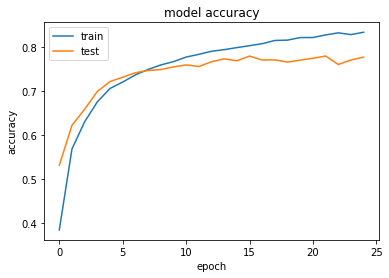

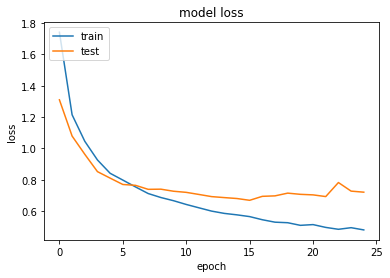

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history.get('acc'))
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()